### Basic simulation and analysis of drift difffusion model.

In this problem, you will perform basic simulations of the simple drift diffusion model:

$$ dx = v dt + \sigma dw $$

1) For $v, \sigma = 1.0, 2.0$, simulate this problem three times (to t=5) and plot the three trajectories. 

2) Simulate 10_000 trajectories and collect the final value of $x$ for each simulation. The variance in the locations of these end locations should be $\sigma^2 * T$. Verify this is true (to numerical approximation).

In [1]:
using Pkg
Pkg.status()

using LinearAlgebra, Plots, Statistics
using DifferentialEquations

Status `~/.julia/environments/v1.10/Project.toml`
  [0c46a032] DifferentialEquations v7.13.0
  [91a5bcdd] Plots v1.40.4
  [2913bbd2] StatsBase v0.34.3


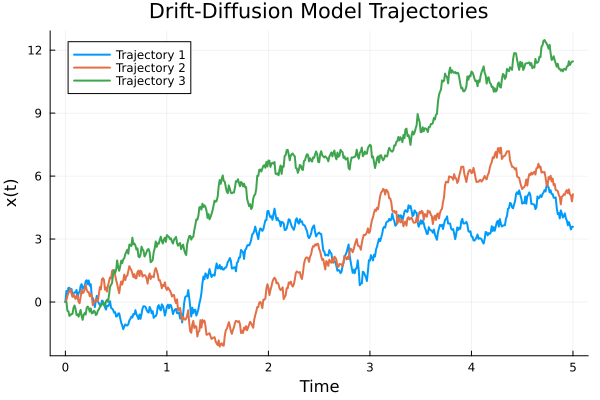

In [20]:

function simulate_trajectory(v, σ, T, dt)
    n_steps = Int(T/dt)
    x = zeros(n_steps + 1)
    t = 0:dt:T
    for i in 1:n_steps
        dw = sqrt(dt) * randn()  # Increment of the Wiener process
        x[i+1] = x[i] + v * dt + σ * dw
    end
    return t, x
end

# Parameters
v = 1.0
σ = 2.0
T = 5.0
dt = 0.01

# Create a plot object and build the plot within the loop
p = plot()  # Initialize the plot object

for a in 1:3
    t, x = simulate_trajectory(v, σ, T, dt)
    plot!(p, t, x, label="Trajectory $a", linewidth=2)  # Add to the existing plot object
end

title!(p, "Drift-Diffusion Model Trajectories")
xlabel!(p, "Time")
ylabel!(p, "x(t)")
display(p)  # Display the plot object that now contains the trajectories


In [27]:
using Statistics  # Ensure you have this for mean and var functions

function simulate_end_locations(v, σ, T, dt, n_simulations)
    n_steps = Int(T/dt)
    end_locations = zeros(n_simulations)
    for j in 1:n_simulations
        x = 0
        for i in 1:n_steps
            dw = sqrt(dt) * randn()
            x += v * dt + σ * dw
        end
        end_locations[j] = x
    end
    return end_locations
end

# Adjusting parameters for possibly better accuracy
dt = 0.001  # Smaller time step
n_simulations = 10000
v = 1.0
σ = 2.0
T = 5.0

end_locations = simulate_end_locations(v, σ, T, dt, n_simulations)
calculated_variance = var(end_locations)
calculated_mean = mean(end_locations)
expected_variance = σ^2 * T
expected_mean = v * T  # Expected mean should be v*T

println("Calculated Variance: $calculated_variance")
println("Expected Variance: $expected_variance")
println("Calculated Mean: $calculated_mean")
println("Expected Mean: $expected_mean")


Calculated Variance: 19.551297042932177
Expected Variance: 20.0
Calculated Mean: 4.9698742164568666
Expected Mean: 5.0
